---
#### ***E-mail Classification***
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.head(1)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."


In [4]:
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})

In [5]:
x, y = df['Message'], df['Category']

In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

# Convert emails to TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [7]:
# Train a logistic regression classifier
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [8]:
# Predict and evaluate
y_pred = model.predict(X_test_vec)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nclassification_report : \n", classification_report(y_test, y_pred))


Accuracy: 0.9730941704035875

classification_report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       960
           1       0.99      0.81      0.89       155

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



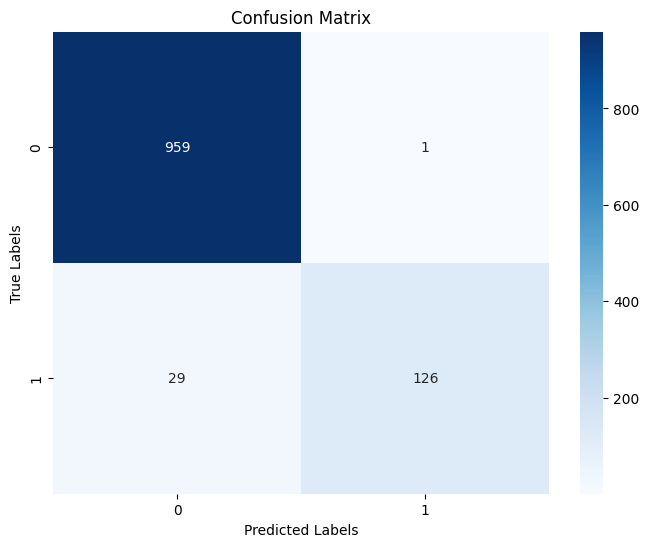

In [9]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [10]:
def predict_(model, message):
    vect = vectorizer.transform([message])
    result = model.predict(vect)
    if result[0] == 0:
        return 'Ham'
    return 'Spam'

In [11]:
print(predict_(model, "You have won a 1 week free membership in our exam Text the word"))

Spam
